# Data Wrangling Notebook
1. Load data
2. Evaluate
3. Tweak
5. Store

## Loading the data

In [136]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
   
df = pd.concat(map(lambda file: pd.read_csv(file, sep=';'), glob.glob(os.path.join('', "./data/*.txt"))))

In [137]:
# Let's see what we got
# Remove blanks from column names first
df.columns = df.columns.str.strip()
df.sample(10)

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
10973,433,19780116,5,10.3,4.6,5,0.0,0,5.5,0,0.3,4.6,1004.6,0.7,72.0,4.0,-2.1,-4.4,eor
127,402,18760507,-999,-999.0,-999.0,5,0.0,0,-999.0,0,5.3,-999.0,1020.6,5.8,-999.0,9.5,3.8,-999.0,eor
390,400,19620126,-999,-999.0,-999.0,5,0.3,1,0.1,0,7.2,6.8,-999.0,3.2,88.0,5.8,1.9,0.4,eor
5013,400,19740923,-999,-999.0,-999.0,5,0.5,1,7.1,-999,3.8,9.2,-999.0,11.1,71.0,16.9,7.2,5.3,eor
11363,403,19810210,-999,-999.0,-999.0,10,3.1,8,0.2,0,8.0,6.9,999.1,4.6,78.0,8.1,2.8,3.7,eor
25326,402,19451111,-999,-999.0,-999.0,5,0.5,1,-999.0,0,8.0,7.6,999.6,3.0,100.0,5.4,2.4,2.1,eor
1266,417,19390620,-999,-999.0,-999.0,5,9.5,1,3.4,0,6.7,20.0,-999.0,19.5,88.0,21.7,15.4,-999.0,eor
15443,403,19920413,-999,-999.0,-999.0,10,1.4,6,5.5,0,5.0,6.8,1003.3,9.0,61.0,13.5,7.1,5.0,eor
22167,403,20100910,-999,-999.0,-999.0,10,0.3,6,5.1,0,4.9,14.3,1010.4,15.4,84.0,20.4,11.0,7.3,eor
5566,403,19650329,-999,-999.0,-999.0,5,0.0,0,9.6,0,2.3,9.6,1023.1,10.0,78.0,14.5,6.7,3.8,eor


| Column | Meaning | Unit |
| --- | --- | --- |
| STATIONS_ID | station id ||
| MESS_DATUM | date | yyyymmdd |
| QN_3 | quality level of next columns | coding see paragraph "Quality information" |
| FX | daily maximum of wind gust | m/s |
| FM | daily mean of wind speed | m/s |
| QN_4 | quality level of next columns | coding see paragraph "Quality information" |
| RSK | daily precipitation height | mm |
| RSKF | precipitation form ||
||no precipitation (conventional or automatic measurement), relates to WMO code 10 | 0 |
|| only rain (before 1979) | 1 |
||unknown form of recorded precipitation | 4 |
|| only rain; only liquid precipitation at automatic stations, relates to WMO code 11 | 6 |
|| only snow; only solid precipitation at automatic stations, relates to WMO code 12 | 7 |
|| rain and snow (and/or "Schneeregen"); liquid and solid precipitation at automatic stations, relates to WMO code 13 | 8 |
|| error or missing value or no automatic determination of precipitation form, relates to WMO code 15 | 9 |
| SDK | daily sunshine duration | h |
| SHK_TAG | daily snow depth | cm |
| NM | daily mean of cloud cover | 1/8 |
| VPM | daily mean of vapor pressure | hPa |
| PM | daily mean of pressure | hPa |
| TMK | daily mean of temperature | °C |
| UPM | daily mean of relative humidity | % |
| TXK | daily maximum of temperature at 2m height | °C |
| TNK | daily minimum of temperature at 2m height | °C |
| TGK | daily minimum of air temperature at 5cm above ground | °C |
| eor | End of data record |

Missing values are denoted by -999.

In [138]:
# What dtypes did we get?
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226531 entries, 0 to 3287
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STATIONS_ID  226531 non-null  int64  
 1   MESS_DATUM   226531 non-null  int64  
 2   QN_3         226531 non-null  int64  
 3   FX           226531 non-null  float64
 4   FM           226531 non-null  float64
 5   QN_4         226531 non-null  int64  
 6   RSK          226531 non-null  float64
 7   RSKF         226531 non-null  int64  
 8   SDK          226531 non-null  float64
 9   SHK_TAG      226531 non-null  int64  
 10  NM           226531 non-null  float64
 11  VPM          226531 non-null  float64
 12  PM           226531 non-null  float64
 13  TMK          226531 non-null  float64
 14  UPM          226531 non-null  float64
 15  TXK          226531 non-null  float64
 16  TNK          226531 non-null  float64
 17  TGK          226531 non-null  float64
 18  eor          226531 non-nu

All values are int64 or float64 except *eor*, but *eor* can be dropped because it's just the end of record marker.  
*QN_3*, *QN_4* and RSKF are categorical values.

In [139]:
# Mapping of months to the season they belong to
mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}

In [140]:
clean=(
    df
    .assign(MESS_DATUM = pd.to_datetime(df.MESS_DATUM, format='%Y%m%d')) # Convert to datetime
    .assign(MONTH=lambda df_: df_.MESS_DATUM.dt.month) # Extract month
    .assign(SEASON=lambda df_: df_.MONTH.map(lambda x: mapping[x])) # Map month to season
    .assign(MONTH=lambda df_:df_.MONTH.astype('category')) # It's a categorical 
    .assign(RSKF=lambda df_:df_.RSKF.astype('category')) # It's a categorical 
    .assign(SEASON=lambda df_:df_.SEASON.astype('category')) # It's a categorical 
    .drop('eor', axis=1) # End Of Record is not needed
    .drop('STATIONS_ID', axis=1) # The stations id is not needed
    .drop('QN_3', axis=1) # QN_3 is quality level. It does not contain information useful for classification
    .drop('QN_4', axis=1) # QN_4 is quality level. It does not contain information useful for classification
    .replace(-999, np.nan) # Missing values are encoded as -999
    .sort_values(by='MESS_DATUM') # Sort by timestamp
    .reset_index(drop=True)
)

It usually doesn't make much sense to have features that have too many missing values. Let's see which columns have more than 70% missing values here.

In [141]:
clean.columns[clean.isna().mean() > 0.7]

Index(['FX', 'FM'], dtype='object')

FX and FM are wind speed measurements that do not have much value for us. Temperatures, precipitation etc. are more revevant for us. Therefore we drop those columns. 

In [142]:
# Drop columns with more than 70 % nan values
clean = clean.drop(clean.columns[clean.isna().mean() > 0.7], axis=1)

In [143]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226531 entries, 0 to 226530
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   MESS_DATUM  226531 non-null  datetime64[ns]
 1   RSK         207470 non-null  float64       
 2   RSKF        203806 non-null  category      
 3   SDK         90154 non-null   float64       
 4   SHK_TAG     179935 non-null  float64       
 5   NM          180768 non-null  float64       
 6   VPM         206736 non-null  float64       
 7   PM          126689 non-null  float64       
 8   TMK         225696 non-null  float64       
 9   UPM         206713 non-null  float64       
 10  TXK         225845 non-null  float64       
 11  TNK         225844 non-null  float64       
 12  TGK         184211 non-null  float64       
 13  MONTH       226531 non-null  category      
 14  SEASON      226531 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(11)
memo

The dtypes are ok now. The number of columns is down from 19 to 15. Last thing to look at are the remaining missing values.

In [144]:
clean.isna().sum()

MESS_DATUM         0
RSK            19061
RSKF           22725
SDK           136377
SHK_TAG        46596
NM             45763
VPM            19795
PM             99842
TMK              835
UPM            19818
TXK              686
TNK              687
TGK            42320
MONTH              0
SEASON             0
dtype: int64

There are still many NaN values after removing the columns with more than 70% missing values. The rows with these values could be dropped or values could be imputed. A third option can be that the classifier can cope with missing values. We'll use the *lightgbm* classifier. It's documentation says:

    Missing Value Handle:    
    * LightGBM enables the missing value handle by default. Disable it by setting use_missing=false.
    * LightGBM uses NA (NaN) to represent missing values by default. Change it to use zero by setting zero_as_missing=true.
    * When zero_as_missing=false (default), the unrecorded values in sparse matrices (and LightSVM) are treated as zeros.
    * When zero_as_missing=true, NA and zeros (including unrecorded values in sparse matrices (and LightSVM)) are treated as missing.

According to the documentation we can leave it to the classifier to deal with the remaining NaN values. That's what we will do.

In [145]:
clean.describe()

,RSK,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK
count,207470.000000,90154.000000,179935.000000,180768.000000,206736.000000,126689.000000,225696.000000,206713.000000,225845.000000,225844.000000,184211.000000
mean,1.585282,4.629509,0.643549,5.269477,9.517855,1008.859332,9.436888,75.556749,13.441997,5.515502,3.768915
std,3.850532,4.396419,2.925902,2.325513,4.054038,9.283759,7.835416,13.104653,9.046761,7.016573,7.019797
min,0.000000,0.000000,0.000000,0.000000,0.900000,957.000000,-22.600000,19.000000,-18.000000,-26.800000,-33.400000
25%,0.000000,0.300000,0.000000,3.700000,6.300000,1003.100000,3.500000,67.000000,6.300000,0.500000,-0.900000
50%,0.000000,3.600000,0.000000,5.700000,8.900000,1009.100000,9.600000,77.000000,13.600000,5.600000,3.900000
75%,1.500000,7.900000,0.000000,7.300000,12.500000,1014.800000,15.600000,86.000000,20.600000,11.100000,9.200000
max,196.900000,16.500000,63.000000,8.000000,25.400000,1048.700000,31.100000,100.000000,38.600000,24.500000,23.000000


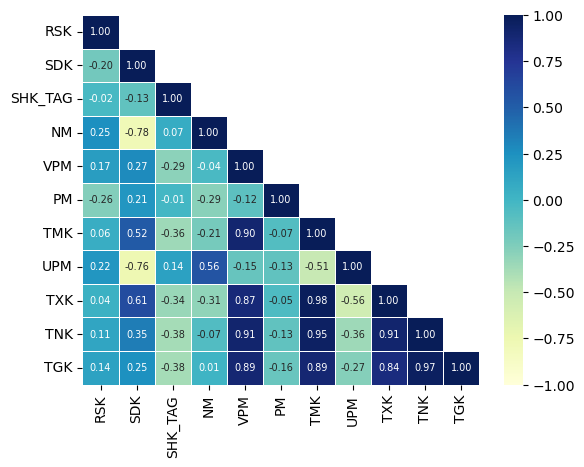

In [146]:
# Compute correlation matrix
corr_df = clean.corr()
# Reduce to the lower triangle
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
# Display as a heatmap
sns.heatmap(df_lt, annot=True, annot_kws={"size": 7}, fmt='.2f', vmin=-1, vmax=1, linewidths=.5, cmap="YlGnBu");

We see that there is a high correlation between min, max and average temparatures what is quite obvious. \
The sunshine duration (SDK), mean cloud cover (NM) and mean relative humidity (UPM) have negative correlation.

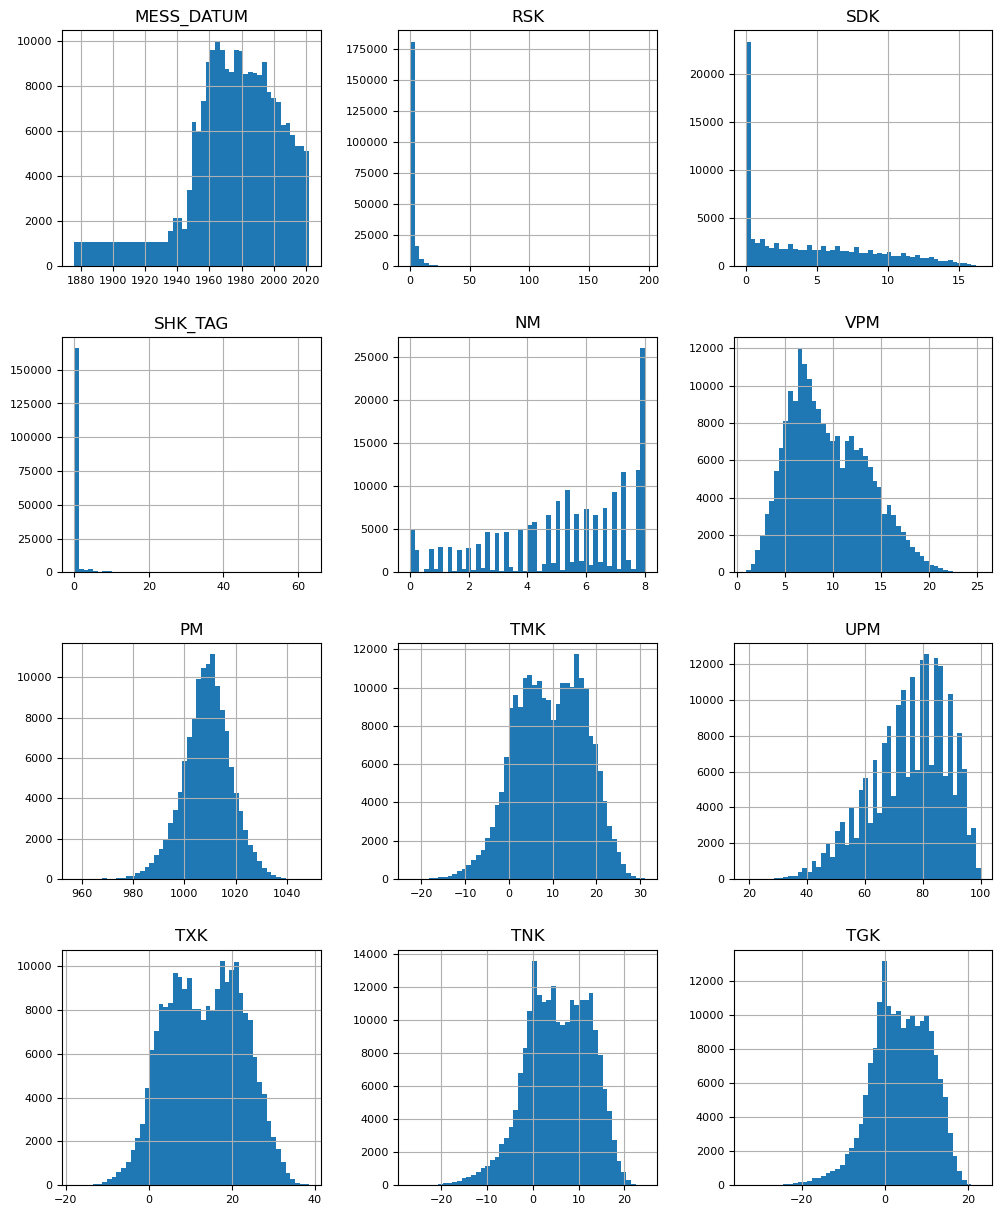

In [147]:
clean.hist(figsize=(12, 15), bins=50, xlabelsize=8, ylabelsize=8);

In [148]:
# Takes about 18 minutes on my computer
# The pairplot will show 
# sns.pairplot(clean,hue='SEASON',height=3, vars=['RSK', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'TMK', 'UPM', 'TXK', 'TNK', 'TGK']);

In many cases the data for a season is clearly separated from the data of other seasons. That should give a classifier a good chance to predict the season a datapoint belongs to.  
We also see why the histograms of TMK, TXK and TGK have two peaks. Spring and autumn have quite similar wider spread temperatures. One peak is formed by the lower tempartures in winter, the other by higher temperatues during summer.

There doesn't seem to be much snow in this region. Let's have a closer look at that.

In [149]:
clean.loc[clean.SHK_TAG > 0].SHK_TAG.count() / (clean.SHK_TAG.count())

0.09172756828854864

In 9% of the rows in our cleaned dataset the snow hight is above 0.

In [150]:
clean.loc[clean.SHK_TAG > 0].SEASON.value_counts()

Winter    13497
Spring     2182
Autumn      826
Summer        0
Name: SEASON, dtype: int64

In [151]:
clean.loc[clean.SHK_TAG > 0].MONTH.value_counts(sort=False)

1     5771
2     4682
3     2043
4      137
5        2
6        0
7        0
8        0
9        0
10       8
11     818
12    3044
Name: MONTH, dtype: int64

The most days with a snow are in the period December to March.

In [152]:
clean.query('SHK_TAG == SHK_TAG.max()')

,MESS_DATUM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,MONTH,SEASON
120145,1979-02-18,0.0,0,NaN,63.0,7.3,4.4,NaN,-2.4,87.0,-1.5,-5.6,-7.2,2,Winter


The maximum snow depth was measured in February 1979. That was a really [harsh winter in Germany](https://www.vintag.es/2021/01/1978-germany-blizzard.html).

>This blizzard was just the beginning of the winter that crippled everything in Germany, for another round of snow and ice of similar proportions fell later on February 18/19, 1979.

In [153]:
# Store the data that will be used in the ML part
clean.to_parquet('./data/cleaned_dataset.parquet')